## クラスタリング

クラスタリングは、類似するデータを類似度や距離などの指標を用いていくつかのグループに分割する手法です。クラスタリングでは、分けられたグループのことをクラスタまたはカテゴリと呼びます。

クラスタリングは顧客を購買履歴などから類似する顧客に分類する顧客セグメンテーション、類似の内容を含む文書を分類するテキストマイニングや、類似の画像を分類する画像認識など、様々な分野で利用されています。また、正常なデータと異常なデータを分類する異常検知にも利用されます。

クラスタリングはデータを自動的に分類する

各クラスタの名前づけは人間が行う

クラスタリングは機械学習の分野では、データがどのグループ（例えば動物の種名や分類群）に属するかという情報を与えず、それ以外の情報を用いて学習することから**教師なし学習**の一つとして扱われます。クラスタリングの手法はいくつかありますが、ここではk平均法を紹介します。

## k平均法 (k-means法)

*k*平均法は、データを任意の*k*個のクラスタに分割する手法です。*k*平均法は、以下の手順でクラスタリングを行います。

1. データを*k*個のクラスタにランダムに分割する
2. 各クラスタの重心を計算する
3. 各データを最も近い重心を持つクラスタに再分割する
4. 2, 3を繰り返す
5. クラスタの再分割が行われなくなったら終了

*k*平均法を用いてペンギンデータをクラスタリングしてみましょう。


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# データの読み込み
penguins = sns.load_dataset("penguins")

# データの確認
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


データ上には`species`列が存在するので、ペンギンの身体の部位の大きさや体重、生息地の情報から


In [3]:
# データの前処理
# 欠損値を含む行の削除
penguins = penguins.dropna()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
penguins["species"] = le.fit_transform(penguins["species"])

# データの分割
X = penguins.drop(columns=["species", "island", "sex"])  # speciesを含め、数値を含まない列を削除
y = penguins["species"]

# データの標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [4]:
# k平均法の実行
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_std)

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=0)

kの数はいくつにするのがよい？

エルボー法は古い？

### 結果の確認と比較

データがどのように分類されたか、元のデータと比較して確認してみましょう。


In [5]:
# クラスタリング結果の確認
# クラスタリング結果のラベル
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
(labels==np.array(y)).sum() / len(labels)

0.37237237237237236

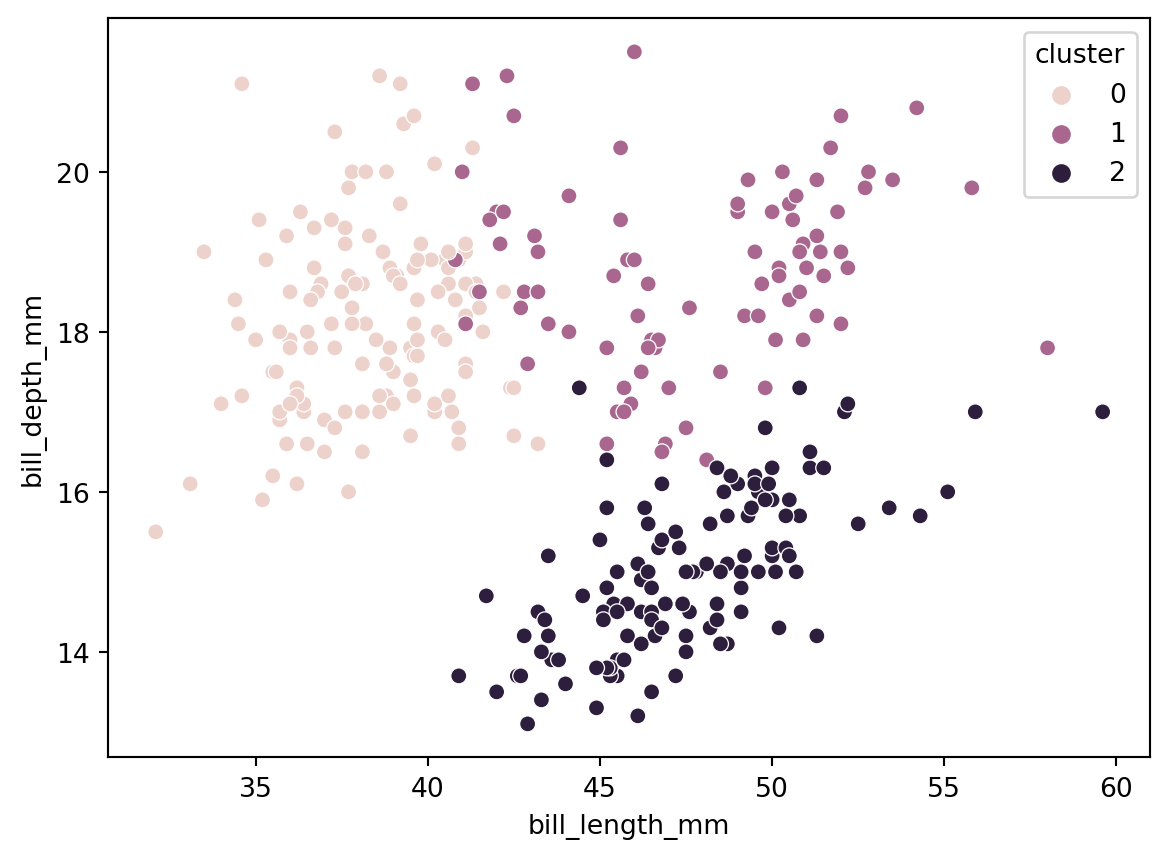

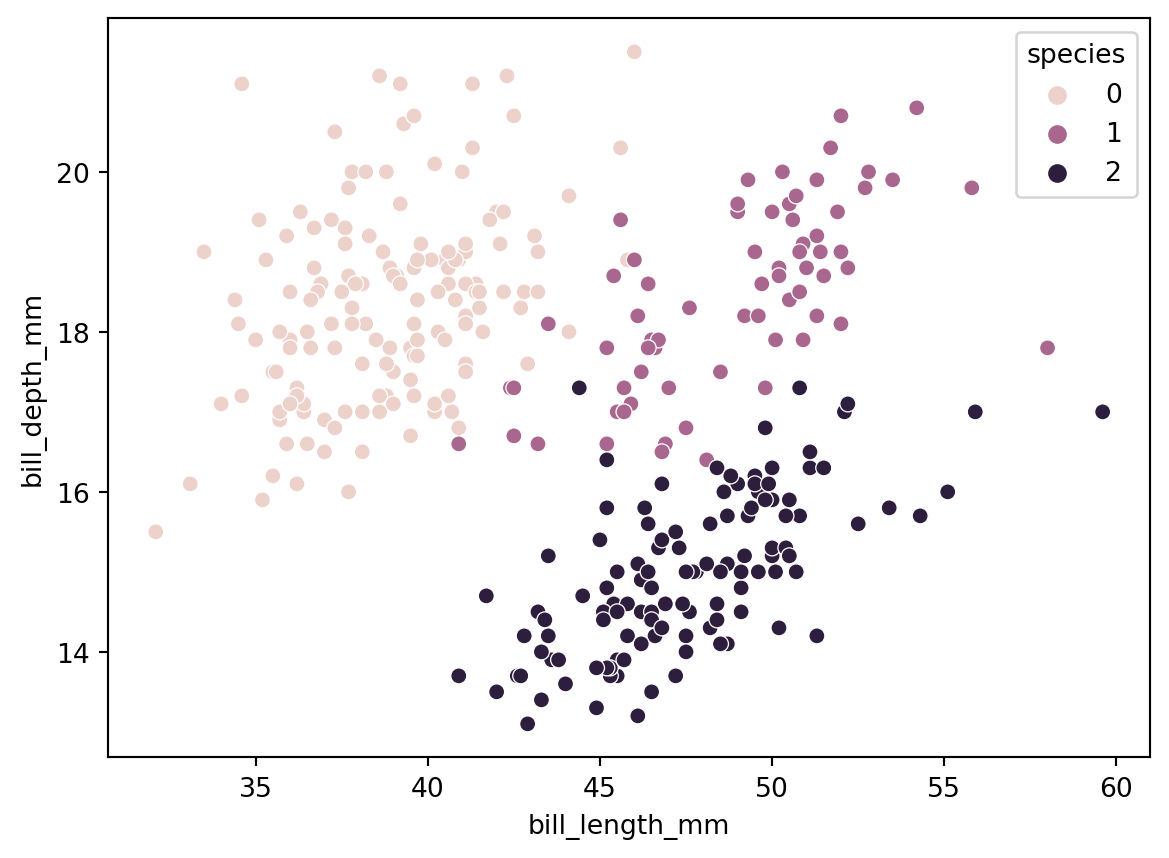

In [7]:
# Xにラベルを追加
X["cluster"] = np.where(labels == 1, 2, np.where(labels == 2, 1, labels))

# クラスタリング結果のプロット
# bill_length vs bill_depth
sns.scatterplot(data=X, x="bill_length_mm", y="bill_depth_mm", hue="cluster")
plt.show()

sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.show()

不一致のデータを確認してみましょう。


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

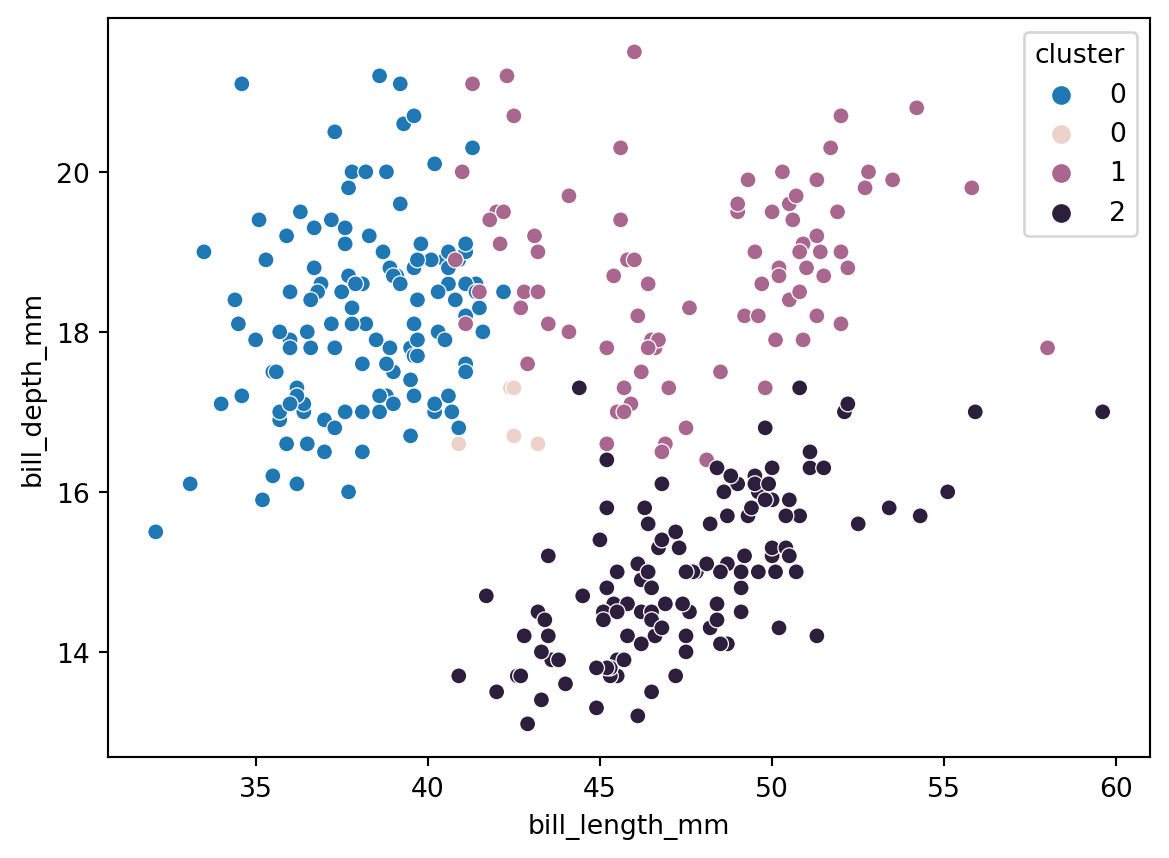

In [8]:
# 不一致のデータを確認
# sns.scatterplotに追加
sns.scatterplot(data=X[labels == np.array(y)], x="bill_length_mm", y="bill_depth_mm", hue="cluster")
# 不一致のデータを追加
sns.scatterplot(data=X[labels != np.array(y)], x="bill_length_mm", y="bill_depth_mm", hue="cluster")